#Trabalho Final - Operações básicas em DL via Keras (Base Fashion_MNIST)



In [0]:
import keras
from keras.datasets import fashion_mnist
from matplotlib import pyplot
from random import randint
from keras.models import Sequential

In [0]:
# Configurar nossos sets de treinamento e teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_test_ori = x_test
y_test_ori = y_test

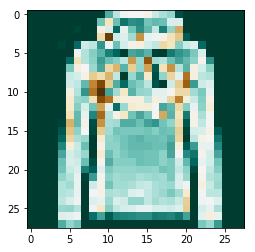

In [4]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='BrBG_r'); #Testar com outros itens - só mudar o cmap - cmaps possíveis: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r e +

In [0]:
# Definindo nosso modelo de CNN

# Redefinindo as dimensões de entrada para garantir que a convolução funcione

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
# Convertendo vetores de classes em matrizes de classe binária

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [8]:
# Definindo nosso modelo

model = Sequential()
model.add(Conv2D(32, 
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# Definindo nosso treinamento

training = model.fit(x_train, 
                     y_train,
                     epochs=1,
                     verbose=True, 
                     validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 12s 226us/step - loss: 13.6741 - acc: 0.1515 - val_loss: 14.4552 - val_acc: 0.1032


In [12]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 1s 52us/step
Test loss: 14.5
Test accuracy: 10.000%


# Testando novos modelos

In [0]:
#modelo 2
model2 = Sequential()
model2.add(Flatten(input_shape=input_shape))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [17]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
training2 = model2.fit(x_train, 
                     y_train,
                     epochs=5,
                     batch_size=128,
                     verbose=True, 
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 30us/step - loss: 10.5160 - acc: 0.3466 - val_loss: 10.6307 - val_acc: 0.3397
Epoch 2/5
54000/54000 [==============================] - 1s 26us/step - loss: 9.6469 - acc: 0.4009 - val_loss: 9.0009 - val_acc: 0.4407
Epoch 3/5
54000/54000 [==============================] - 1s 26us/step - loss: 8.9146 - acc: 0.4465 - val_loss: 8.8337 - val_acc: 0.4510
Epoch 4/5
54000/54000 [==============================] - 1s 27us/step - loss: 8.7615 - acc: 0.4560 - val_loss: 9.1060 - val_acc: 0.4348
Epoch 5/5
54000/54000 [==============================] - 1s 26us/step - loss: 8.6761 - acc: 0.4614 - val_loss: 8.6009 - val_acc: 0.4660


In [20]:
loss, accuracy = model2.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 0s 44us/step
Test loss: 8.6
Test accuracy: 46.650%


Diminuindo o modelo a acurácia não melhora

# Testando um modelo mudando os dados de entrada

In [0]:
# normaliza as imagens em escala de cinza
x_train_pb = x_train / 255.0
x_test_pb = x_test / 255.0

In [0]:
#modelo 3
model3 = Sequential()
model3.add(Flatten(input_shape=input_shape))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [23]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
training3 = model3.fit(x_train_pb, 
                     y_train,
                     epochs=10,
                     batch_size=128,
                     verbose=True, 
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.5571 - acc: 0.8098 - val_loss: 0.4299 - val_acc: 0.8493
Epoch 2/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.4124 - acc: 0.8543 - val_loss: 0.3838 - val_acc: 0.8617
Epoch 3/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.3739 - acc: 0.8676 - val_loss: 0.3774 - val_acc: 0.8622
Epoch 4/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.3475 - acc: 0.8760 - val_loss: 0.3688 - val_acc: 0.8635
Epoch 5/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.3255 - acc: 0.8824 - val_loss: 0.3439 - val_acc: 0.8768
Epoch 6/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.3090 - acc: 0.8897 - val_loss: 0.3473 - val_acc: 0.8712
Epoch 7/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.2968 - acc: 0.8925 - val_loss: 0.3404 - val_acc:

In [26]:
loss, accuracy = model3.evaluate(x_test_pb, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 0s 42us/step
Test loss: 0.347
Test accuracy: 87.930%


###  O melhor resultado para a acurácia foi o modelo 3 com o valor de 87,93%

# Testes de predição com o melhor modelo

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# obtendo previsões no conjunto de testes
y_hat = model3.predict(x_test_pb)

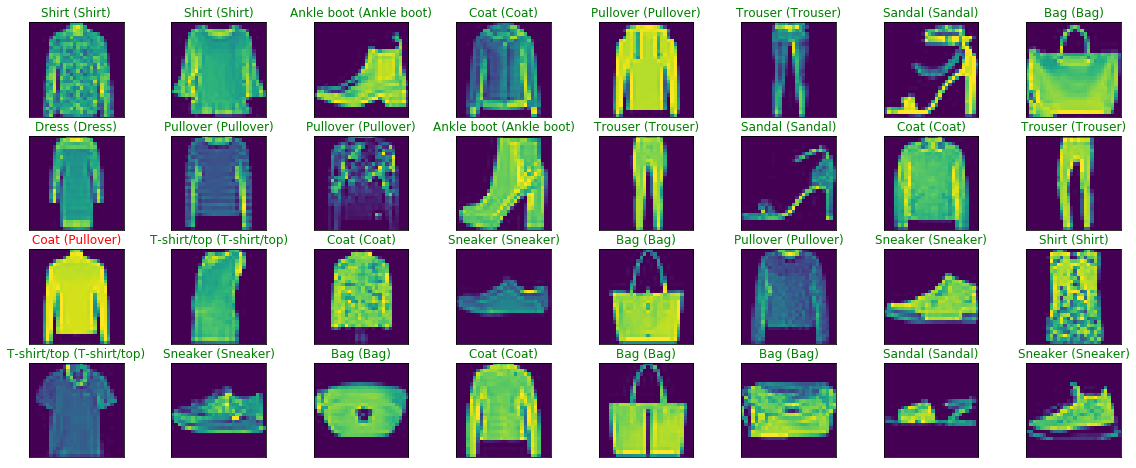

In [34]:
import numpy as np 

# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = pyplot.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test_ori.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test_ori[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx=y_test_ori[idx]
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
